plot some example ROIs that are stable place cells throughout first 6 days of imaging
plot cell footprint on day1 and day6 with cell highlighted and red green overlay as red and purple, union is white

In [1]:
import os
import math

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec

import suite2p as s2p

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

In [49]:
sess = u.single_mouse_concat_sessions(ctrl_mice[0], date_inds = np.arange(6))

29_11_2020 YMaze_LNovel
30_11_2020 YMaze_LNovel
01_12_2020 YMaze_LNovel
02_12_2020 YMaze_LNovel
03_12_2020 YMaze_LNovel
04_12_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


In [55]:
sess.s2p_stats[0].shape

(376,)

In [3]:
pc_mask = sess.fam_place_cell_mask() + sess.nov_place_cell_mask() >0

In [16]:
pc_inds = np.argwhere(pc_mask)[:,0]

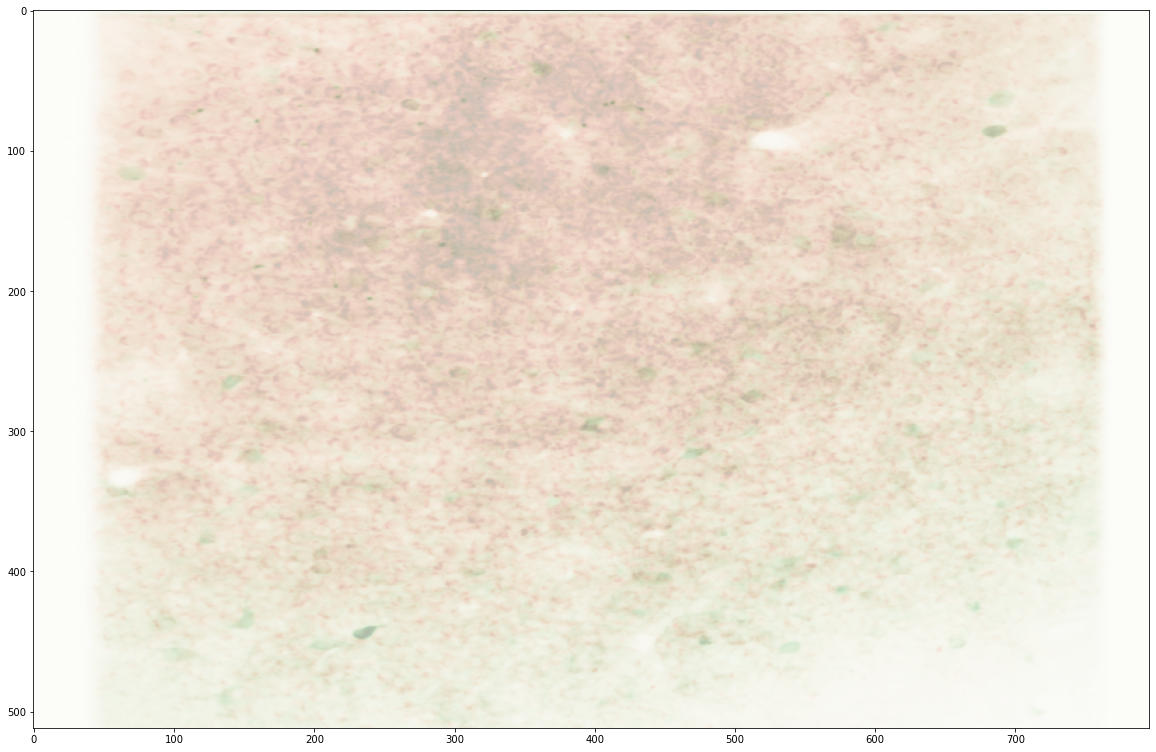

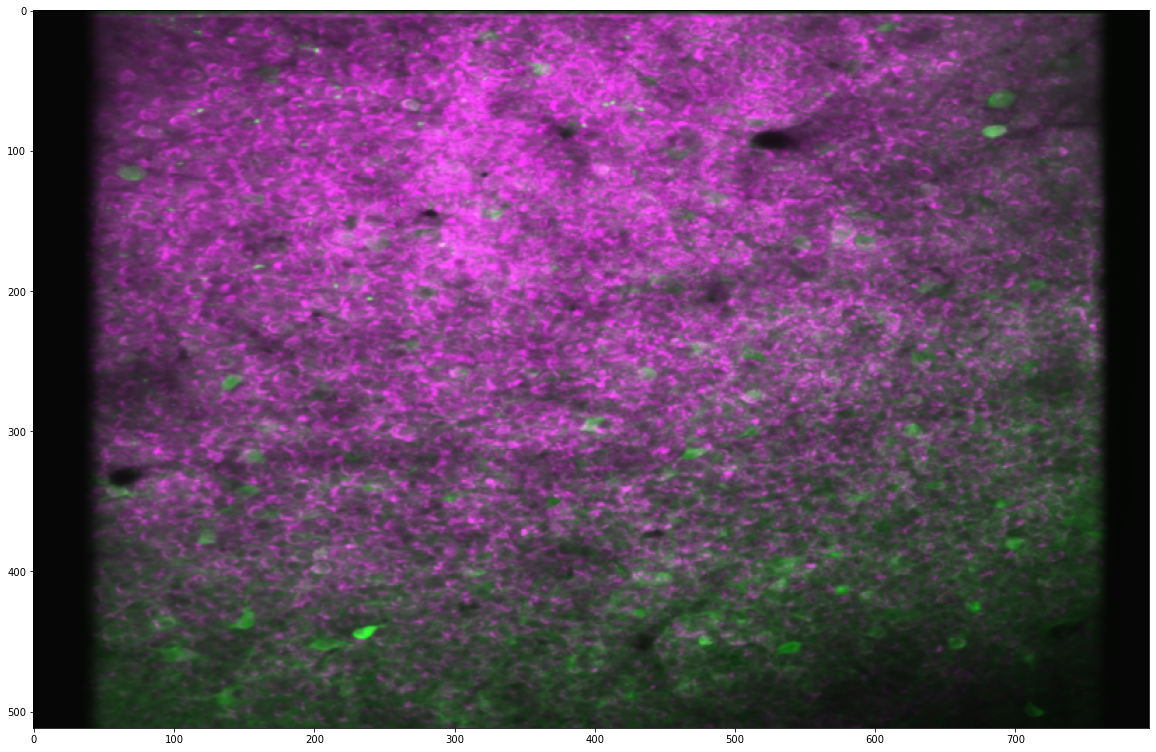

In [44]:

cimg = np.zeros([512,796,3])

green = sess.s2p_ops['meanImg']
green = np.clip(green/np.percentile(green,100),0,1)

red = sess.s2p_ops['meanImg_chan2']
red = np.clip(red/np.percentile(red,100),0,1)

fig, ax = plt.subplots(figsize= [20,20])
cimg[:,:,0]= red
cimg[:,:,2]=red
cimg[:,:,1]=green
ax.imshow(cimg)


[77, 177, 589, 689]
[89, 189, 246, 346]
[44, 144, 128, 228]
[347, 447, 155, 255]
[276, 376, 109, 209]
[255, 355, 298, 398]
[48, 148, 266, 366]
[109, 209, 240, 340]
[34, 134, 416, 516]
[201, 301, 216, 316]


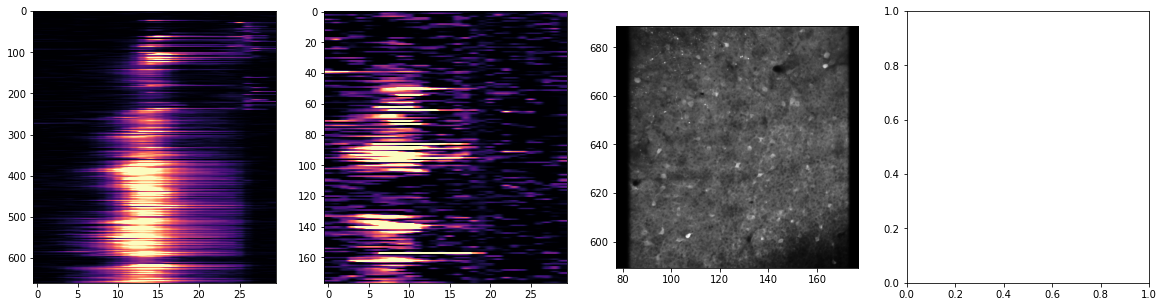

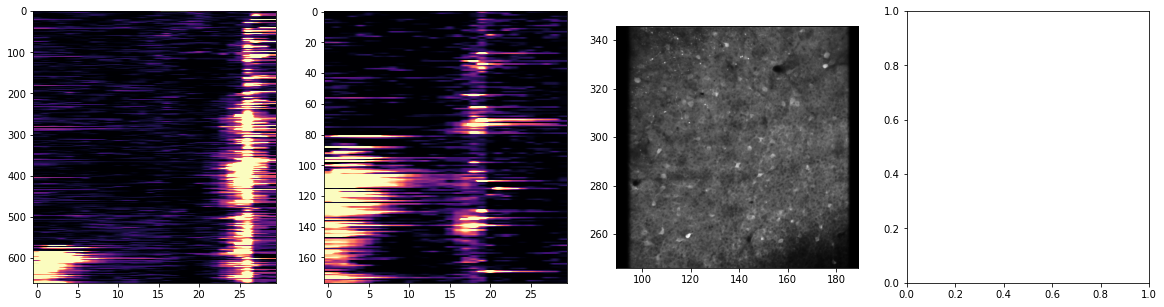

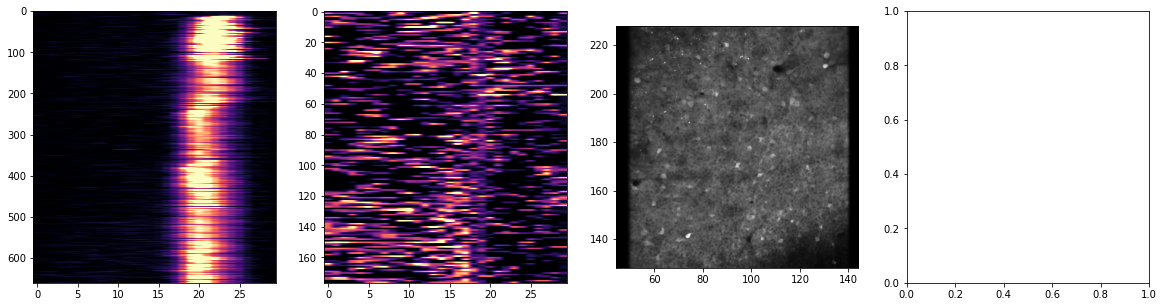

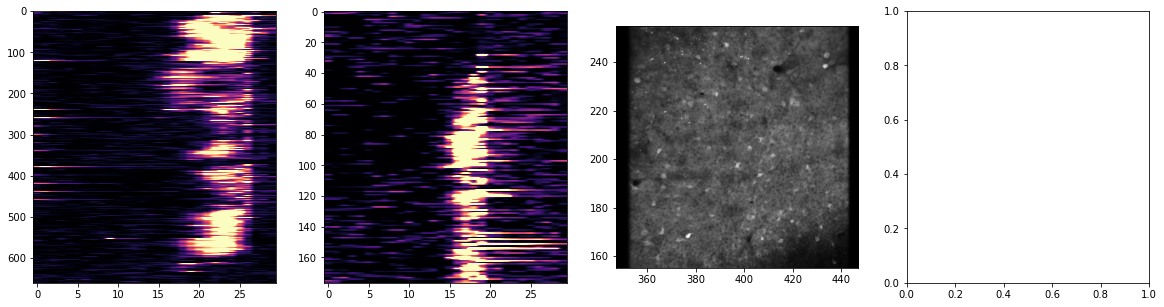

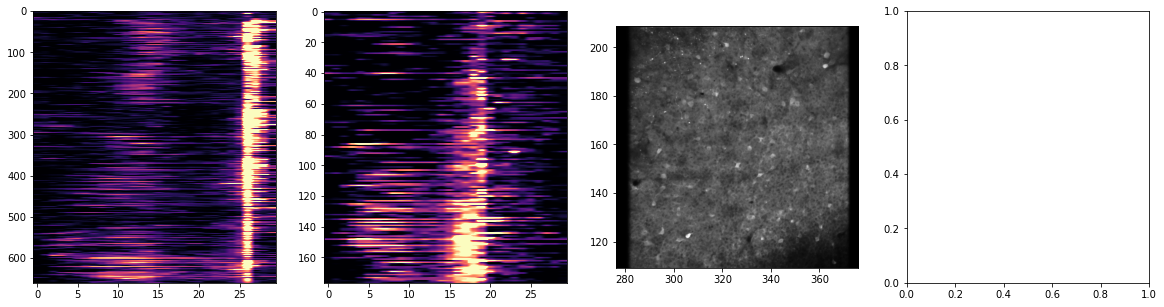

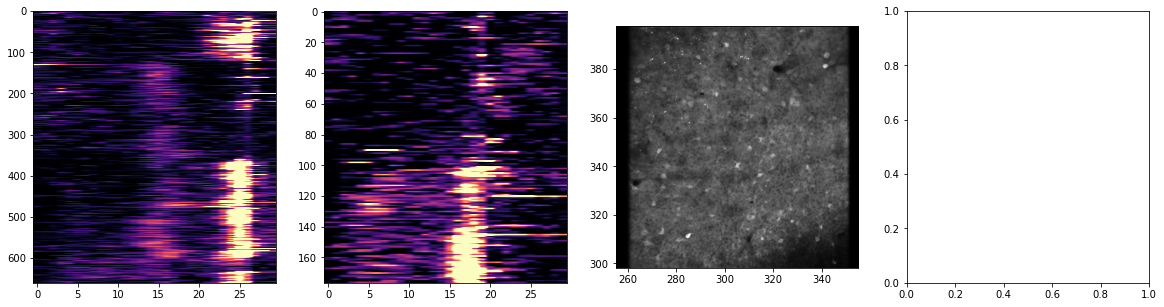

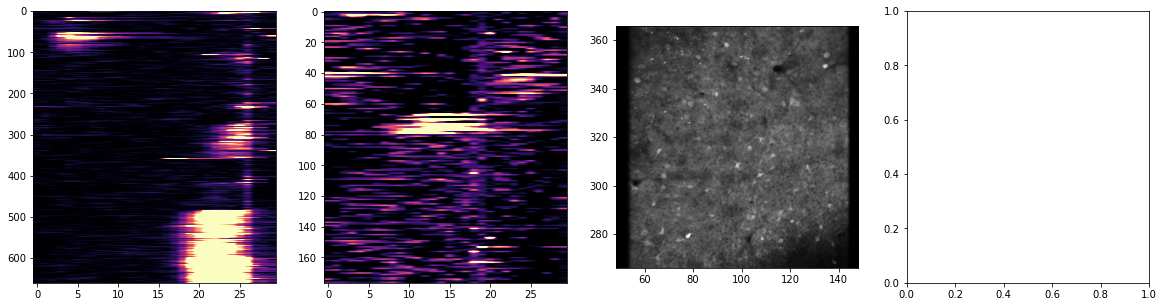

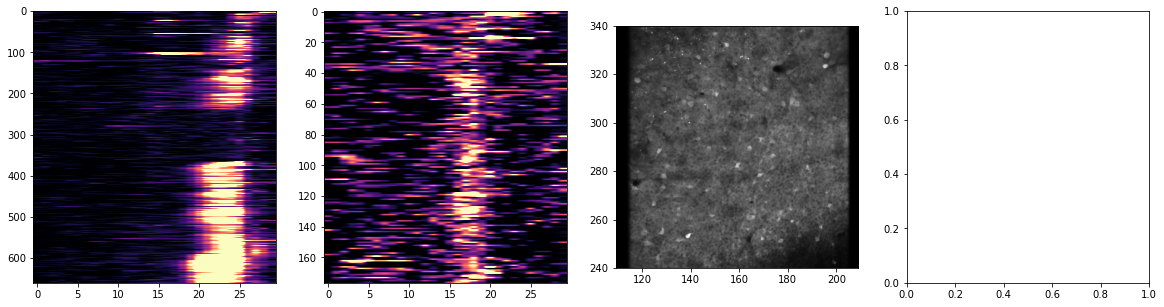

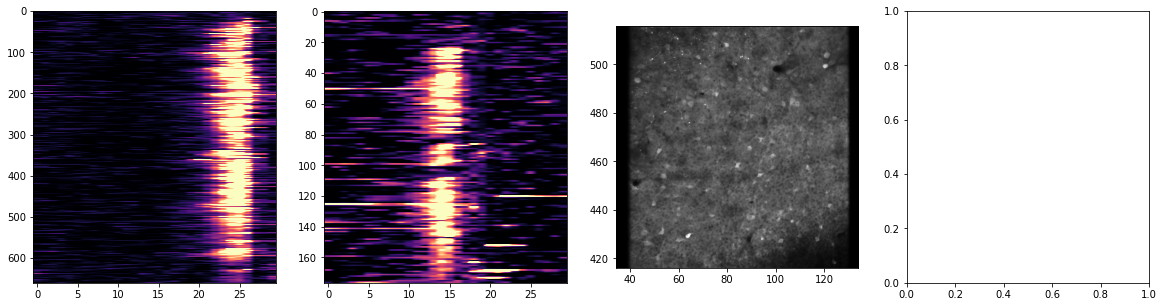

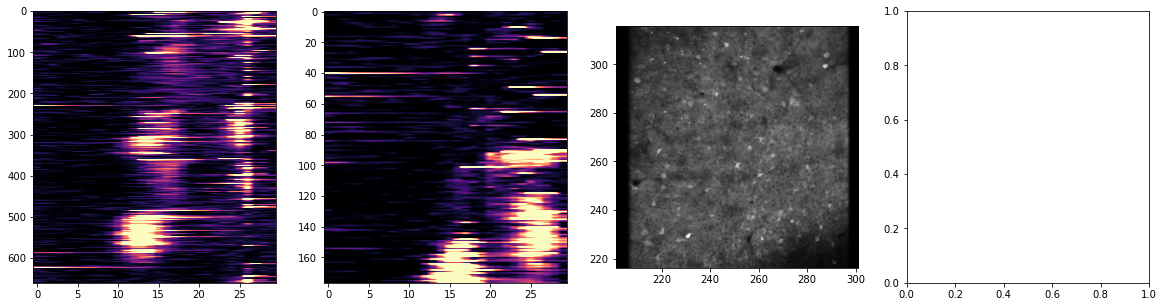

In [66]:
for cell in pc_inds[:10]:
    fig, ax = plt.subplots(1,4, figsize = [20, 5])
    
    fam_trialmat, nov_trialmat = sess.trial_matrices['spks'][sess.trial_info['LR']==-1*sess.novel_arm,:,:][:,:,cell], sess.trial_matrices['spks'][sess.trial_info['LR']==sess.novel_arm,:,:][:,:,cell]
    fam_trialmat[np.isnan(fam_trialmat)]=1E-3
    nov_trialmat[np.isnan(nov_trialmat)]=1E-3
    ax[0].imshow(fam_trialmat/np.nanmean(fam_trialmat), cmap = 'magma', aspect='auto', vmin = 0, vmax=5)
    ax[1].imshow(nov_trialmat/np.nanmean(nov_trialmat), cmap = 'magma', aspect='auto', vmin = 0, vmax=5)
    
    day0_com = (sess.s2p_stats[0][cell]['xpix'].mean(), sess.s2p_stats[0][cell]['ypix'].mean())
    day5_com = (sess.s2p_stats[5][cell]['xpix'].mean(), sess.s2p_stats[5][cell]['ypix'].mean())
    
    day0img = np.zeros([512,796,3])
    
    
    print([np.int(day0_com[1]-50), np.int(day0_com[1]+50), np.int(day0_com[0]-50), np.int(day0_com[0]+50) ])
    ax[2].imshow(sess.s2p_ops[0]['meanImg'],cmap='Greys_r', extent=[np.int(day0_com[1]-50), np.int(day0_com[1]+50), np.int(day0_com[0]-50), np.int(day0_com[0]+50) ])

#     ax[2].scatter(*day0_com)
#    